## Creating Word Vectors with word2vec

Reference: [Jon Krohn](https://github.com/the-deep-learners/TensorFlow-LiveLessons/blob/master/notebooks/creating_word_vectors_with_word2vec.ipynb)

In this notebook we create word vectors from a corpus of public-domain books from [Project Gutenberg](http://www.gutenberg.org/)

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
nltk.download('punkt')
# English-language sentence tokenizer
#(not all periods end sentences; not all sentences start with a capital letter)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Load Data



In [4]:
from nltk.corpus import gutenberg

In [5]:
nltk.download("gutenberg")

# this downloads 18 books which we will use as our corpus

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [6]:
len(gutenberg.fileids())

18

In [7]:
gutenberg.fileids()

# the names of the books we are using for our dataset

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Tokenize the Text


In [8]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [9]:
gberg_sent_tokens[0:5]

# we can see the tokenizer has created text lists

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [10]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [11]:
word_tokenize(gberg_sent_tokens[1])

# this function breaks sentences down into words

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [12]:
word_tokenize(gberg_sent_tokens[1])[14]

# we can now list index

'father'

In [13]:
# a convenient method that handles newlines,
# as well as tokenizing sentences and words in one shot

# this function creates the tokenization automatically
gberg_sents = gutenberg.sents()

In [14]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [15]:
gberg_sents[4]

# we can see how the sentence was converted into words - which will be tokenized

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [16]:
gberg_sents[4][14]

'father'

In [17]:
# another method to split into words
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [18]:
# our Gutenberg corpus is 2.6m words in length:
len(gutenberg.words())

2621613

Run word2vec

In [19]:
model = Word2Vec(sentences=gberg_sents, vector_size=64, sg=1, window=10, min_count=5, seed=42, workers=8)

# sentences
# size = number of dimensions in vector space
# sg = skip grams algorithm (small corpus, rare words)
# window = 10 default - 20 context words (10 left, 10 right of target word)
# min_counts = only run on words that occur 5 times
# seed = 42
# workers = how many cores you want to use on your machine

# this takes about 2 minutes on a GPU


In [20]:
model.save('raw_gutenberg_model.w2v')

Explore the model

In [21]:
# skip re-training the model with the next line
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [23]:
# the word 'dog' is represented in 64-dimensional space

vector = model.wv['dog']
print(vector)

[ 0.07691161 -0.6904316   0.5739559  -0.1247475  -0.27949414 -0.18334408
 -0.26723725 -0.17163841 -0.33053502  0.07369547 -0.09612393  0.09095383
  0.58810794  0.22083993  0.09179891 -0.19063504 -0.47236007  0.2458128
 -0.24679196  0.5699005  -0.08896773  0.07701162 -0.33272758 -0.21596196
  0.12432544 -0.3213323  -0.3946469  -0.50682986 -0.03583233  0.39005914
  0.3787042   0.27061704 -0.20385264  0.24280332  0.3508212  -0.18255556
  0.59978986 -0.15827192 -0.00260415  0.0719586   0.18990283  0.04725646
 -0.03464087 -0.23702003  0.27602986  0.26404515  0.09433574 -0.4110025
 -0.39879912 -0.14184748  0.00478622 -0.2586511   0.01592644 -0.05871447
 -0.31052727 -0.16916375  0.03948574 -0.28146073 -0.03975529 -0.45024845
  0.2530816  -0.10916226 -0.3264885   0.52237856]


In [24]:
len(vector)

64

In [26]:
# we can also see how 'far' the word dog is from other words

similar_words = model.wv.most_similar('dog')
print(similar_words)

[('puppy', 0.8107926845550537), ('cage', 0.7861666083335876), ('sweeper', 0.7705239057540894), ('boy', 0.7599146962165833), ('thief', 0.7550572752952576), ('cow', 0.7531970143318176), ('pig', 0.7487018704414368), ('pet', 0.7480846047401428), ('lazy', 0.747917652130127), ('shell', 0.7439669370651245)]


In [27]:
# what are the words closest to... think?

similar_words = model.wv.most_similar('think')
print(similar_words)

[('suppose', 0.8438664674758911), ('manage', 0.8141621351242065), ('Mamma', 0.7892916202545166), ('know', 0.7869941592216492), ('downright', 0.7859529256820679), ('contradict', 0.785345196723938), ('want', 0.7798153758049011), ('_you_', 0.7782740592956543), ('argue', 0.7773091197013855), ('shouldn', 0.7760196924209595)]


In [28]:
similar_words = model.wv.most_similar('day')
print(similar_words)

[('morning', 0.8217222690582275), ('week', 0.7433263659477234), ('night', 0.7401016354560852), ('evening', 0.7284647822380066), ('month', 0.7243908643722534), ('time', 0.7169555425643921), ('sabbath', 0.7048120498657227), ('feasting', 0.6911693215370178), ('Adar', 0.6822903752326965), ('fourteenth', 0.6800700426101685)]


In [29]:
similar_words = model.wv.most_similar('father')
print(similar_words)

[('mother', 0.8839996457099915), ('brother', 0.8487312197685242), ('sister', 0.833499550819397), ('Amnon', 0.7870844006538391), ('daughter', 0.7729617953300476), ('wife', 0.7480830550193787), ('Tamar', 0.743358314037323), ('uncle', 0.7390921711921692), ('Michal', 0.7313633561134338), ('Nabal', 0.7304142713546753)]


In [31]:
# which of those terms does not belong?

odd_one_out = model.wv.doesnt_match("mother father daughter animal".split())
print(odd_one_out)

# clearly dog is farther away from the other points

animal


In [32]:
similarity_score = model.wv.similarity('father', 'dog')
print(similarity_score)

0.51018405


In [35]:
# close, but not quite
# father - man + woman... we expect words related to father, but not male
# notice the direction of the vectors - to female


similar_words = model.wv.most_similar(positive=['father', 'woman'], negative=['man'])
print(similar_words)

[('sister', 0.7959074378013611), ('daughter', 0.7958605289459229), ('mother', 0.79296875), ('wife', 0.7599126696586609), ('husband', 0.7543144822120667), ('brother', 0.7278252840042114), ('Rachel', 0.7043885588645935), ('elder', 0.7020210027694702), ('child', 0.7006139159202576), ('Amnon', 0.6964656114578247)]


In [34]:
# son - man + woman = ?
similar_words = model.wv.most_similar(positive=['son', 'woman'], negative=['man'])
print(similar_words)

[('wife', 0.7500224113464355), ('daughter', 0.7492948174476624), ('conceived', 0.7245756387710571), ('Leah', 0.7198481559753418), ('Hittite', 0.7117483615875244), ('Sarah', 0.7085086107254028), ('Caleb', 0.7066434025764465), ('Bethuel', 0.7043115496635437), ('Sarai', 0.7029576301574707), ('Bilhah', 0.7027988433837891)]


In [37]:
# husband - man + woman = wife

similar_words = model.wv.most_similar(positive=['husband', 'woman'], negative=['man'])
print(similar_words)

[('wife', 0.7022883892059326), ('daughter', 0.6982455253601074), ('sister', 0.6859927773475647), ('conceived', 0.6805551052093506), ('child', 0.6634303331375122), ('mother', 0.6488844156265259), ('maid', 0.6482528448104858), ('nurse', 0.643230676651001), ('widow', 0.6300963759422302), ('womb', 0.6166350245475769)]


Other examples could be...

In [38]:
# we can see queen is related to king, when we remove man from king and add woman

similar_words = model.wv.most_similar(positive=['king', 'woman'], negative=['man'])
print(similar_words)

[('Rachel', 0.6894217729568481), ('Solomon', 0.6780685782432556), ('Laban', 0.6695806980133057), ('Sarah', 0.6688690781593323), ('daughter', 0.6615456342697144), ('queen', 0.6528981328010559), ('Leah', 0.641636848449707), ('Sarai', 0.6415531039237976), ('eunuchs', 0.6410366892814636), ('Padanaram', 0.6376568078994751)]


In [39]:
similar_words = model.wv.most_similar(positive=['London', 'Japan'], negative=['England'])
print(similar_words)

[('deserted', 0.8162589073181152), ('schoolroom', 0.8133882284164429), ('drifted', 0.8009099364280701), ('travelled', 0.7969241142272949), ('sauntering', 0.7917042374610901), ('stationary', 0.7900680899620056), ('alighted', 0.7899385690689087), ('towing', 0.789629340171814), ('spar', 0.7883622646331787), ('vehicle', 0.7882964015007019)]


Reduce word vector dimensionality with t-SNE



*  t-distributed, stochastic, neighboring, embedding




In [41]:
# allow us to convert each word in 64D space into smaller space

vocab = model.wv.key_to_index
print(vocab)

{',': 0, 'the': 1, 'and': 2, '.': 3, 'of': 4, ':': 5, 'to': 6, 'a': 7, 'in': 8, 'I': 9, ';': 10, 'that': 11, 'he': 12, 'his': 13, "'": 14, 'it': 15, 'was': 16, 'for': 17, 'not': 18, 'with': 19, 'And': 20, 'is': 21, 'be': 22, '"': 23, 'you': 24, 'as': 25, 'all': 26, 'him': 27, 'they': 28, 'shall': 29, 'her': 30, 'them': 31, 'had': 32, 'have': 33, 's': 34, 'my': 35, 'said': 36, 'me': 37, 'but': 38, 'unto': 39, '-': 40, 'from': 41, 'at': 42, 'which': 43, 'on': 44, 'by': 45, 'this': 46, 'The': 47, 'their': 48, 'she': 49, '?': 50, 'will': 51, 'were': 52, 'LORD': 53, 'are': 54, 'so': 55, 'thou': 56, 'or': 57, '."': 58, 'one': 59, '!': 60, 'out': 61, '--': 62, 'man': 63, 'thy': 64, 'when': 65, 'there': 66, 'up': 67, 'no': 68, 'God': 69, 'your': 70, 'thee': 71, 'an': 72, ',"': 73, 'But': 74, 'upon': 75, 'ye': 76, 'do': 77, 'we': 78, 'what': 79, 'into': 80, 'more': 81, 'if': 82, 'would': 83, 'very': 84, 'He': 85, 'who': 86, 'could': 87, 'been': 88, 'now': 89, 'like': 90, 'before': 91, 'any': 92

In [42]:
# we have 17011 words in our vocab that occur at least 5 times each
len(vocab)

17011

In [45]:
# create variable that captures the co-ordinates in the 64D vector space
import numpy as np
# Get the list of words in the vocabulary
words = list(model.wv.key_to_index.keys())

# Extract the vectors for these words
X = np.array([model.wv[word] for word in words])

print(X)

[[ 0.00304185 -0.04968731 -0.07399791 ...  0.01675651 -0.51358354
   0.49572968]
 [ 0.01557148  0.00791866  0.08993448 ...  0.01877886 -0.32036814
   0.44499686]
 [ 0.24644041 -0.1387792   0.09259706 ...  0.2357125  -0.05772455
   0.58172965]
 ...
 [ 0.08504536 -0.03398647  0.05283814 ...  0.17266291 -0.28563282
   0.27104566]
 [ 0.02849828 -0.10748482  0.00142978 ...  0.0578334  -0.29588917
   0.19497637]
 [-0.00744986 -0.21418518  0.061548   ...  0.00905367 -0.1702722
  -0.01140614]]


In [46]:
# reduce the dimensionality
# create an instance of the TSNE - we want 2D so we can see it

tsne = TSNE(n_components=2, n_iter=1000) # 200 is minimum iter; default is 1000

In [47]:
# this line fits the object to a 2D representation

# this takes a while to run on a GPU - usually around 4min.

X_2d = tsne.fit_transform(X)

In [48]:
X_2d[0:5]

array([[-12.791524, -38.850693],
       [-12.539184, -38.19394 ],
       [-12.596295, -38.496613],
       [-13.619606, -38.81681 ],
       [-12.332129, -38.173843]], dtype=float32)

In [50]:
# Take the new representation and create a df so we can visualise the data

coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = words


In [51]:
# we can see how this has now produced a df with 2D (down from 64D)

coords_df.head()

,x,y,token
0,-12.791524,-38.850693,","
1,-12.539184,-38.193939,the
2,-12.596295,-38.496613,and
3,-13.619606,-38.816811,.
4,-12.332129,-38.173843,of


In [52]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

Visualise 2D Representation of Word Vectors

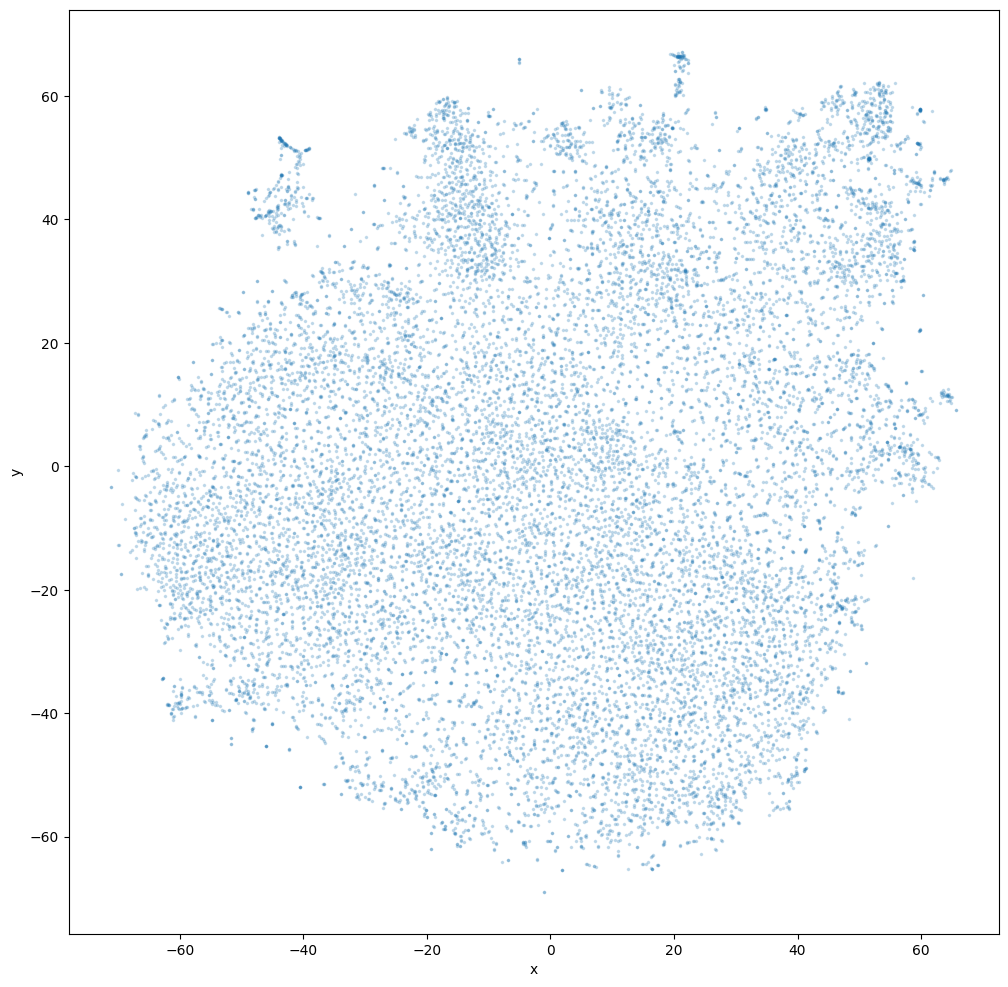

In [53]:
# this produces a visual of the corpus with positions

_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [54]:
# Load Bokeh to create interactive plot

output_notebook()

In [55]:
# set the number of words you want visualize

subset_df = coords_df.sample(n=5000)

# change sampling

In [59]:
p = figure(width=800, height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [60]:
show(p)

# scroll into the word cloud

We can improve this by converting words to lower case, defining pronouns etc.